In [1493]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier

import numpy as np

In [1446]:
spotify = pd.read_csv("Spotify Dataset.csv", encoding='cp1252')

In [1447]:
len(spotify['top genre'].value_counts())

50

In [1448]:
#spotify['title_length'] = spotify.apply(lambda x: len(x['title']),axis=1)

In [1449]:
#spotify['artist_length'] = spotify.apply(lambda x: len(x['artist']),axis=1)

### Removing Irrelevant Columns

In [1450]:
spotify = spotify.drop(columns=['title','artist','year'])


In [1487]:
spotify

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,4,97,89,67,-4,8,80,217,19,4,83
1,3,87,93,75,-5,52,64,263,24,23,82
2,1,120,84,76,-3,29,71,200,10,14,80
3,1,119,92,70,-4,8,71,295,0,4,79
4,1,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...
598,1,104,66,61,-7,20,16,176,1,3,75
599,1,95,79,75,-6,7,61,206,21,12,75
600,1,136,76,53,-5,9,65,260,7,34,70
601,1,114,79,60,-6,42,24,217,1,7,69


### Recategorizing Music

#### Pop

In [1451]:
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'dance pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'canadian pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'barbadian pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'art pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'australian dance' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'columbian pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'acoustic pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'folk-pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'baroque pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'indie pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'candy pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'danish pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'metropopolis' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'hollywood' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'moroccan pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'hollywood' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'australian pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'colombian pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'pop' if x['top genre'] == 'boy band' else x['top genre'],axis=1)

#### Soul

In [1452]:
spotify['top genre'] = spotify.apply(lambda x: 'soul' if x['top genre'] == 'british soul' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'soul' if x['top genre'] == 'canadian contemporary r&b' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'soul' if x['top genre'] == 'alternative r&b' else x['top genre'],axis=1)

#### Hip Hop

In [1453]:
spotify['top genre'] = spotify.apply(lambda x: 'hiphop' if x['top genre'] == 'hip pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'hiphop' if x['top genre'] == 'atl hip hop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'hiphop' if x['top genre'] == 'hip hop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'hiphop' if x['top genre'] == 'escape room' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'hiphop' if x['top genre'] == 'detroit hip hop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'hiphop' if x['top genre'] == 'canadian hip hop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'hiphop' if x['top genre'] == 'chicago rap' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'hiphop' if x['top genre'] == 'australian hip hop' else x['top genre'],axis=1)


#### EDM

In [1454]:
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'electropop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'complextro' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'tropical house' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'brostep' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'electro' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'downtempo' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'electronic trap' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'belgian edm' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'electro house' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'house' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'edm' if x['top genre'] == 'big room' else x['top genre'],axis=1)


#### Country Rock

In [1455]:
spotify['top genre'] = spotify.apply(lambda x: 'countryrock' if x['top genre'] == 'neo mellow' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'countryrock' if x['top genre'] == 'irish singer-songwriter' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'countryrock' if x['top genre'] == 'celtic rock' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'countryrock' if x['top genre'] == 'contemporary country' else x['top genre'],axis=1)


#### Alternative

In [1456]:
spotify['top genre'] = spotify.apply(lambda x: 'alternative' if x['top genre'] == 'permanent wave' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'alternative' if x['top genre'] == 'alaska indie' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'alternative' if x['top genre'] == 'french indie pop' else x['top genre'],axis=1)


#### Latin

In [1457]:
spotify['top genre'] = spotify.apply(lambda x: 'latin' if x['top genre'] == 'canadian latin' else x['top genre'],axis=1)


#### Other

In [1458]:
spotify['top genre'] = spotify.apply(lambda x: 'other' if x['top genre'] == 'latin' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'other' if x['top genre'] == 'alternative' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'other' if x['top genre'] == 'countryrock' else x['top genre'],axis=1)


#### hiphopr&b

In [1459]:
spotify['top genre'] = spotify.apply(lambda x: 'hiphopr&b' if x['top genre'] == 'hiphop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 'hiphopr&b' if x['top genre'] == 'soul' else x['top genre'],axis=1)


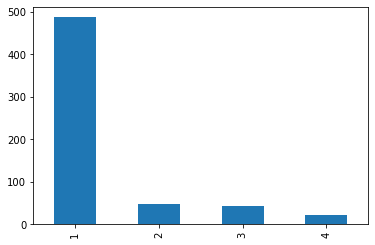

In [1483]:
spotify['top genre'].value_counts().sort_values(ascending=False).plot(kind = 'bar')

In [1484]:
spotify['top genre'].value_counts()

1    487
2     49
3     44
4     23
Name: top genre, dtype: int64

### Converting Categories into numerical values

In [1461]:
spotify['top genre'] = spotify.apply(lambda x: 1 if x['top genre'] == 'pop' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 2 if x['top genre'] == 'edm' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 3 if x['top genre'] == 'hiphopr&b' else x['top genre'],axis=1)
spotify['top genre'] = spotify.apply(lambda x: 4 if x['top genre'] == 'other' else x['top genre'],axis=1)

### Split the data and train the model

In [1462]:
y = spotify['top genre']
X = spotify.drop(columns=['top genre'])

pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X)

In [1463]:
X_train, X_test, y_train, y_test = train_test_split(Xreduced, y, test_size=0.3,random_state=53)

In [1464]:
svm = LinearSVC()

In [1465]:
ovr_classifier = OneVsRestClassifier(svm)

In [1466]:
ovr_classifier = ovr_classifier.fit(X_train, y_train)

C:\Users\54208\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\54208\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\54208\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\54208\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [1467]:
y_pred = ovr_classifier.predict(X_test)

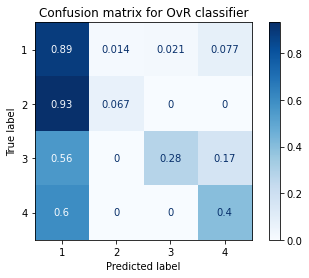

In [1468]:
matrix = plot_confusion_matrix(ovr_classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for OvR classifier')
plt.show(matrix)
plt.show()

In [1469]:
confusion_matrix(y_test, y_pred)

array([[127,   2,   3,  11],
       [ 14,   1,   0,   0],
       [ 10,   0,   5,   3],
       [  3,   0,   0,   2]], dtype=int64)

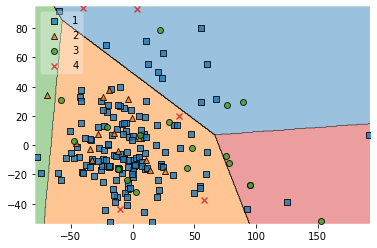

In [1470]:
plot_decision_regions(X_test, y_test.to_numpy(), clf=ovr_classifier, legend=2)

In [1471]:
target_names = ['pop', 'edm', 'hiphopr&b','other']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         pop       0.82      0.89      0.86       143
         edm       0.33      0.07      0.11        15
   hiphopr&b       0.62      0.28      0.38        18
       other       0.12      0.40      0.19         5

    accuracy                           0.75       181
   macro avg       0.48      0.41      0.39       181
weighted avg       0.74      0.75      0.73       181



In [1473]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [1476]:
predictions = mlp.predict(X_test)

In [1490]:
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

         pop       0.79      0.99      0.88       143
         edm       0.00      0.00      0.00        15
   hiphopr&b       0.00      0.00      0.00        18
       other       0.00      0.00      0.00         5

    accuracy                           0.78       181
   macro avg       0.20      0.25      0.22       181
weighted avg       0.62      0.78      0.69       181



C:\Users\54208\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


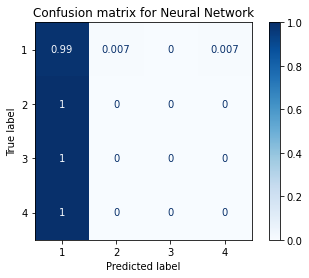

In [1488]:
matrix = plot_confusion_matrix(mlp, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for Neural Network')
plt.show(matrix)
plt.show()

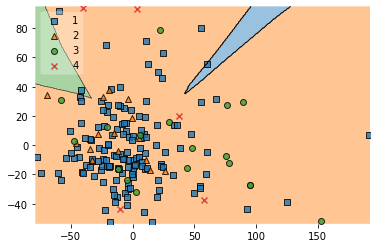

In [1486]:
plot_decision_regions(X_test, y_test.to_numpy(), clf=mlp, legend=2)

### Activation Function

In [1527]:
def weighted_sigmoid(x):
    return 1/(1+np.exp(-x + 7.5))

def sigmoid(x):
    return 1/(1+np.exp(-x))

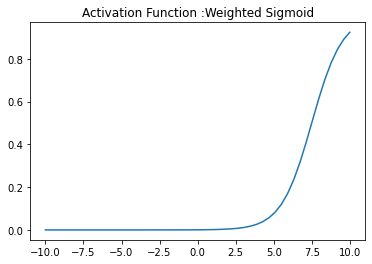

In [1528]:
x = np.linspace(-10, 10)
plt.plot(x, weighted_sigmoid(x))
plt.axis('tight')
plt.title('Activation Function :Weighted Sigmoid')
plt.show()

### Properties

#### Bounded
#### Nonlinear
#### Convex